<a href="https://colab.research.google.com/github/a-cuc/CPE311/blob/main/Finals/Module%2011/HOA%2011.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by: Angelo Luis C. Cu

In [62]:
!pip install hvplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
life_df = pd.read_csv('/content/data/Life Expectancy Data.csv')
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Data Wrangling

In [4]:
# checks for duplicate values
life_df[life_df.duplicated()].shape[0]

0

In [11]:
# changes spaces to underscores for easier column access
life_df.columns = [column.replace(' ', '_') for column in life_df.columns]
life_df.columns = [column.strip('_') for column in life_df.columns]
life_df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
# checks for missing values
life_df.info()
# life expectancy, adult mortality, alcohol, hepatitis B, BMI,
# polio-diptheria, gdp-schooling have NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [15]:
# as all of the missing values are from columns with numerical values,
# and the missing values are less than half of the total count,
# I decided to fill them with their mean
# since country is available, I decided to group them by country to try to minimize bias

for column in life_df.columns:
  if life_df[column].dtype != 'object':
    life_df[column] = life_df.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))

life_df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [16]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2921 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2794 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [19]:
# since there are countries without data for that specific column at all,
# I decided to fill them with the general mean

for column in life_df.columns:
  if life_df[column].dtype != 'object':
    life_df[column] = life_df[column].fillna(life_df[column].mean())

life_df.info()
# all missing data are handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [20]:
# converting categorical to numerical data
columns = [
    'Country','Status'
] # columns to get the unique values
unique_values = []

# gets the unique values of a column and appends it to the unique_values list
for column in columns:
  unique_values.append(life_df[column].unique().tolist())
unique_values

[['Afghanistan',
  'Albania',
  'Algeria',
  'Angola',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bhutan',
  'Bolivia (Plurinational State of)',
  'Bosnia and Herzegovina',
  'Botswana',
  'Brazil',
  'Brunei Darussalam',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  "Côte d'Ivoire",
  'Cabo Verde',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo',
  'Cook Islands',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czechia',
  "Democratic People's Republic of Korea",
  'Democratic Republic of the Congo',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Equatorial Guinea',
  'Eritrea',
  'Estonia',
  'Ethiopia',
  'Fiji',
  'Finland',
  'France',
  'Gabon',
  'Gambia',
  'Geo

In [21]:
# creates the dictionaries
result_dicts = [] # stores the results here

for data in unique_values:
  keys = [i for i in data]
  values = [i for i in range(1, len(data)+1)]
  result_dicts.append({keys[i] : values[i] for i in range(len(values))})
result_dicts

[{'Afghanistan': 1,
  'Albania': 2,
  'Algeria': 3,
  'Angola': 4,
  'Antigua and Barbuda': 5,
  'Argentina': 6,
  'Armenia': 7,
  'Australia': 8,
  'Austria': 9,
  'Azerbaijan': 10,
  'Bahamas': 11,
  'Bahrain': 12,
  'Bangladesh': 13,
  'Barbados': 14,
  'Belarus': 15,
  'Belgium': 16,
  'Belize': 17,
  'Benin': 18,
  'Bhutan': 19,
  'Bolivia (Plurinational State of)': 20,
  'Bosnia and Herzegovina': 21,
  'Botswana': 22,
  'Brazil': 23,
  'Brunei Darussalam': 24,
  'Bulgaria': 25,
  'Burkina Faso': 26,
  'Burundi': 27,
  "Côte d'Ivoire": 28,
  'Cabo Verde': 29,
  'Cambodia': 30,
  'Cameroon': 31,
  'Canada': 32,
  'Central African Republic': 33,
  'Chad': 34,
  'Chile': 35,
  'China': 36,
  'Colombia': 37,
  'Comoros': 38,
  'Congo': 39,
  'Cook Islands': 40,
  'Costa Rica': 41,
  'Croatia': 42,
  'Cuba': 43,
  'Cyprus': 44,
  'Czechia': 45,
  "Democratic People's Republic of Korea": 46,
  'Democratic Republic of the Congo': 47,
  'Denmark': 48,
  'Djibouti': 49,
  'Dominica': 50,
 

In [22]:
# maps the categorical data to their numerical counterparts
for column in range(len(columns)):
  life_df.replace(result_dicts[column], inplace=True)

life_df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,1,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,193,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,193,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,193,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,193,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Exploratory Data Analysis

In [23]:
life_df.describe()
"""
According to this data, the average country is developing,
with a life expectancy of 69 years and a population of 12.73 Million
"""

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,96.091219,2007.518720,1.174268,69.224932,164.796448,30.303948,4.600849,738.251295,78.648111,2419.592240,...,82.396266,5.920966,82.183944,1.742103,7378.404536,1.273472e+07,4.839704,4.870317,0.627551,11.992793
std,56.250042,4.613841,0.379405,9.507640,124.080302,117.926501,4.027279,1987.914858,24.558680,11467.272489,...,23.476067,2.455756,23.743205,5.077785,13158.707178,5.381690e+07,4.394535,4.482708,0.204820,3.264381
min,1.000000,2000.000000,1.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,47.000000,2004.000000,1.000000,63.200000,74.000000,0.000000,0.930000,4.685343,73.500000,0.000000,...,78.000000,4.280000,78.000000,0.100000,562.082880,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,94.000000,2008.000000,1.000000,72.000000,144.000000,3.000000,3.780000,64.912906,88.000000,17.000000,...,93.000000,5.790000,93.000000,0.100000,2834.764218,3.625718e+06,3.400000,3.400000,0.662000,12.100000
75%,146.000000,2012.000000,1.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,...,97.000000,7.430000,97.000000,0.800000,7378.404536,1.273472e+07,7.100000,7.200000,0.772000,14.100000
max,193.000000,2015.000000,2.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [24]:
# comparing by developed and developing countries
developing_life = life_df.query('Status == 1')
developed_life = life_df.query('Status == 2')

In [27]:
developed_life.mean()

Country                            9.525309e+01
Year                               2.007523e+03
Status                             1.000000e+00
Life_expectancy                    6.712018e+01
Adult_Mortality                    1.827588e+02
infant_deaths                      3.638417e+01
Alcohol                            3.493100e+00
percentage_expenditure             3.234703e+02
Hepatitis_B                        7.745355e+01
Measles                            2.824926e+03
BMI                                3.547577e+01
under-five_deaths                  5.052514e+01
Polio                              8.000298e+01
Total_expenditure                  5.576311e+00
Diphtheria                         7.980067e+01
HIV/AIDS                           2.088664e+00
GDP                                4.668433e+03
Population                         1.374722e+07
thinness__1-19_years               5.582378e+00
thinness_5-9_years                 5.624522e+00
Income_composition_of_resources    5.845

In [28]:
developing_life.mean()

Country                            1.000625e+02
Year                               2.007500e+03
Status                             2.000000e+00
Life_expectancy                    7.919785e+01
Adult_Mortality                    7.968555e+01
infant_deaths                      1.494141e+00
Alcohol                            9.849678e+00
percentage_expenditure             2.703600e+03
Hepatitis_B                        8.430827e+01
Measles                            4.990059e+02
BMI                                5.180391e+01
under-five_deaths                  1.810547e+00
Polio                              9.373633e+01
Total_expenditure                  7.554042e+00
Diphtheria                         9.347656e+01
HIV/AIDS                           1.000000e-01
GDP                                2.021901e+04
Population                         7.937177e+06
thinness__1-19_years               1.320703e+00
thinness_5-9_years                 1.296680e+00
Income_composition_of_resources    8.314

<Axes: >

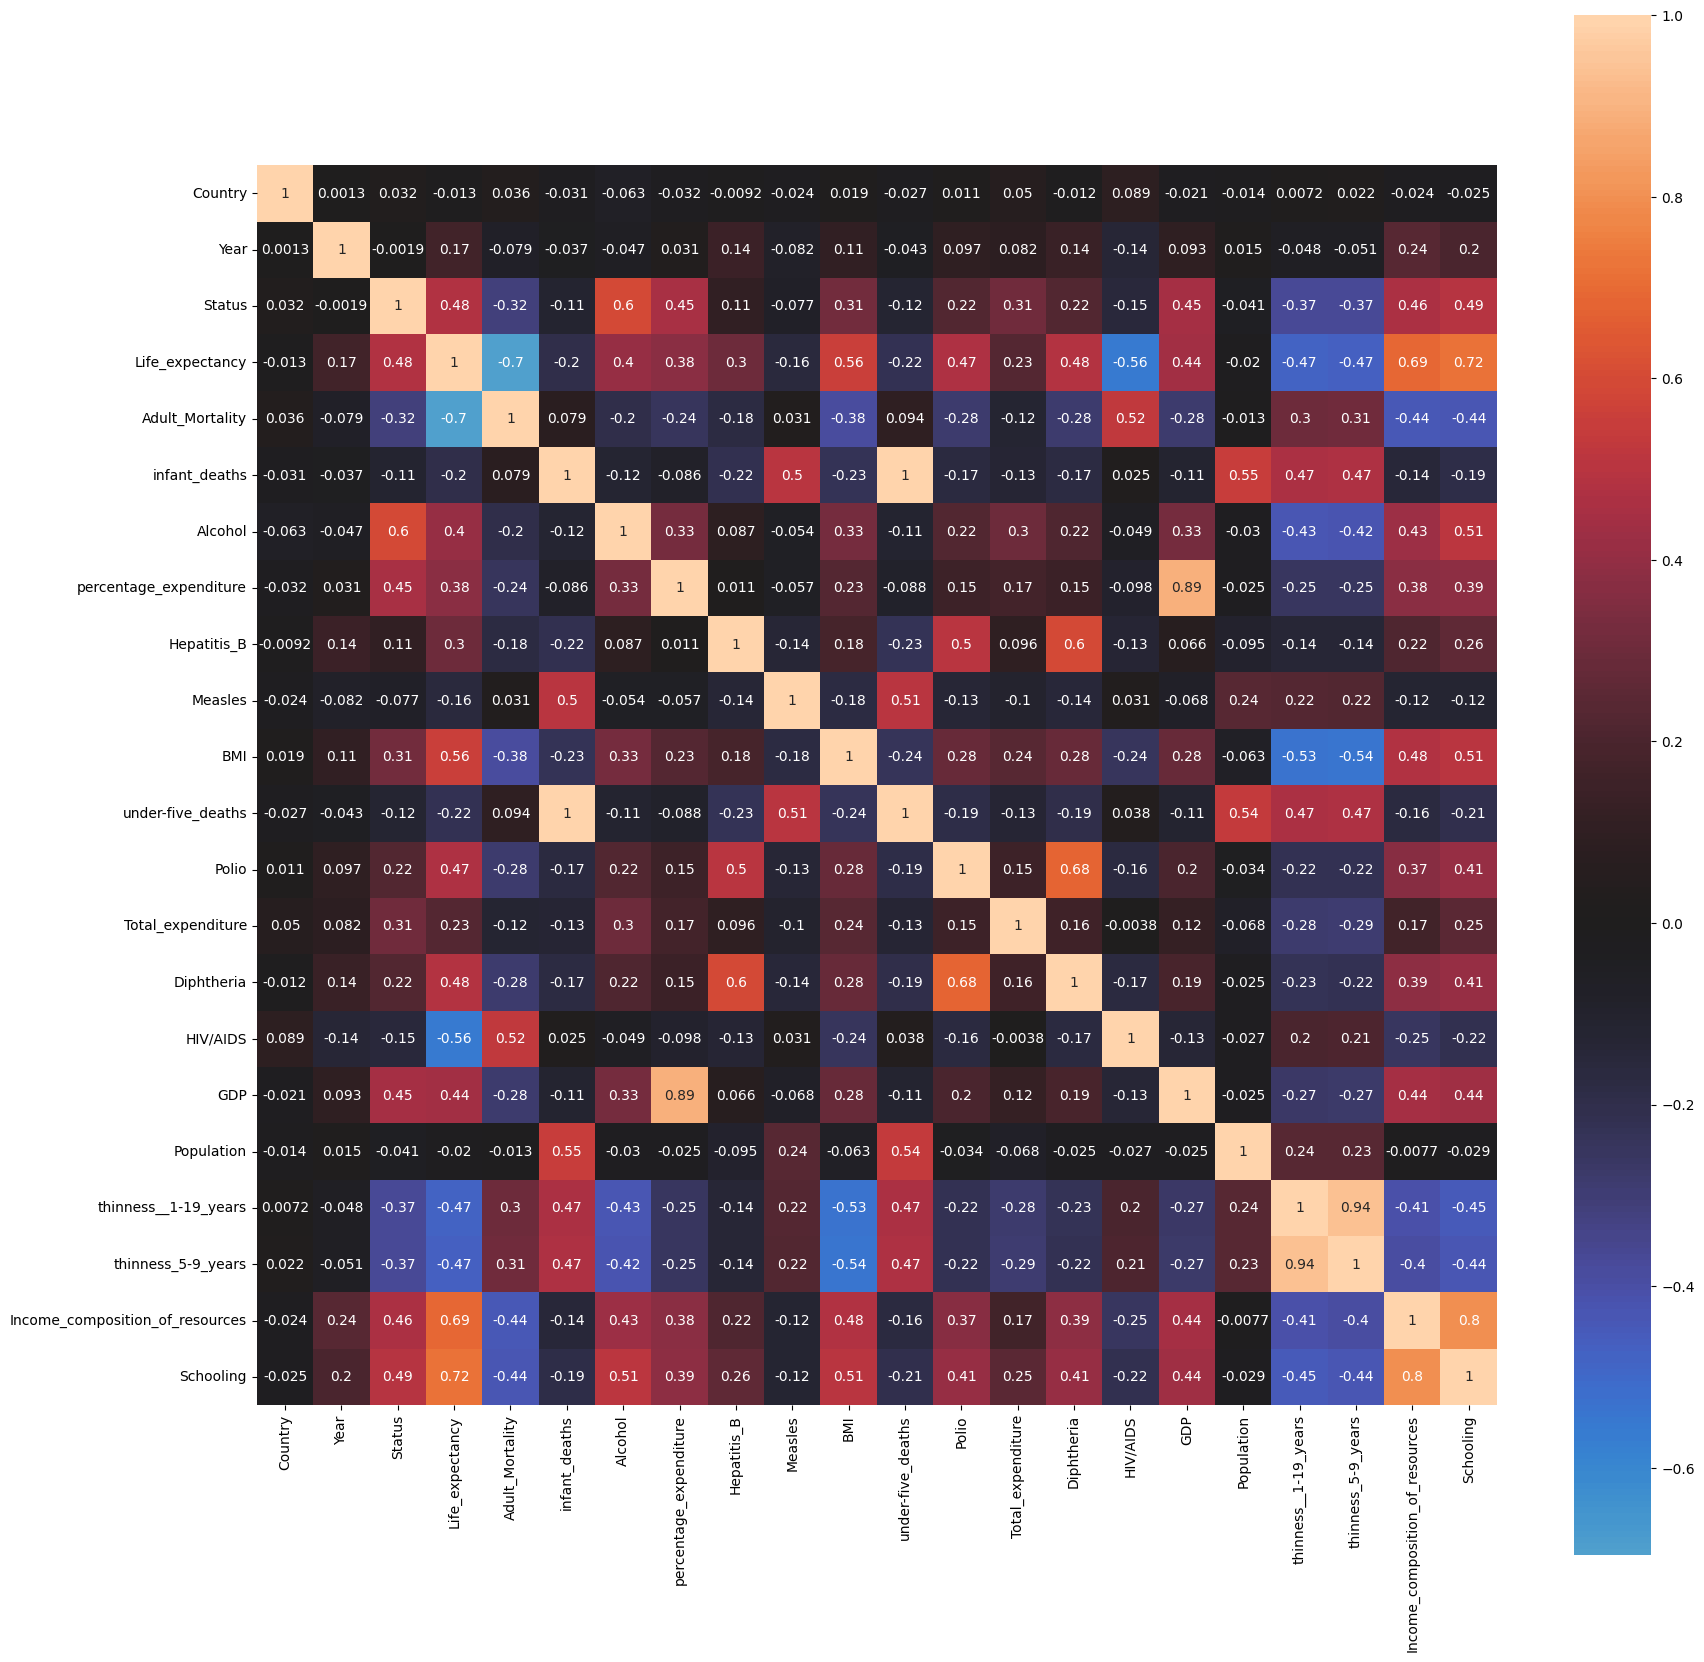

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(
    life_df.sort_index().corr(),
    annot=True, center=0, square=True
)

Simple Linear Regression

In [164]:
# Getting the X and Y arrays
X = life_df.drop(['Country','Life_expectancy'], axis=1)
y = life_df['Life_expectancy']

# The x here is the dependent variable
# While y is the independent variable

In [165]:
print("X=",X.shape,"\ny=",y.shape)

X= (2938, 20) 
y= (2938,)


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [167]:
"""
The values are split to train and test variables
train variables are for machine learning, and where most of the data is found
whereas the test variables are for testing whether the model is accurate
"""

'\nThe values are split to train and test variables\ntrain variables are for machine learning, and where most of the data is found\nwhereas the test variables are for testing whether the model is accurate\n'

In [168]:
X_train.shape

(2056, 20)

In [169]:
X_test.shape

(882, 20)

In [170]:
model = LinearRegression()

In [171]:
model.fit(X_train, y_train)

LinearRegression()

In [172]:
model.coef_

array([-6.02084848e-03,  1.09654477e+00, -1.93493879e-02,  1.11831785e-01,
        9.97628369e-02,  3.81053795e-05, -2.54580140e-03, -1.95327687e-05,
        4.55800328e-02, -8.42263377e-02,  2.97401314e-02,  7.13883874e-02,
        3.22091348e-02, -4.49743238e-01,  5.27130583e-05,  1.27457153e-09,
       -1.10310299e-01,  3.54105011e-02,  5.28539213e+00,  6.74403621e-01])

In [173]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Year,-6.020848e-03
Status,1.096545e+00
Adult_Mortality,-1.934939e-02
infant_deaths,1.118318e-01
Alcohol,9.976284e-02
percentage_expenditure,3.810538e-05
Hepatitis_B,-2.545801e-03
Measles,-1.953277e-05
BMI,4.558003e-02
under-five_deaths,-8.422634e-02


In [174]:
y_pred = model.predict(X_test)

In [175]:
# evaluation metrics, lower is better
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [176]:
MAE

2.972399895070833

In [177]:
MSE

15.349007980330086

In [178]:
RMSE

3.917781002089076

In [179]:
"""
It can be noticed that the metrics are evaluated to be
less than 20, which are low
"""

'\nIt can be noticed that the metrics are evaluated to be\nless than 1x10^-10, 1x10^-18, and 1x10^-9, which are \nvery low\n'

In [180]:
test_residual = y_test - y_pred

Text(0.5, 0.98, 'KDE of Residual Plot')

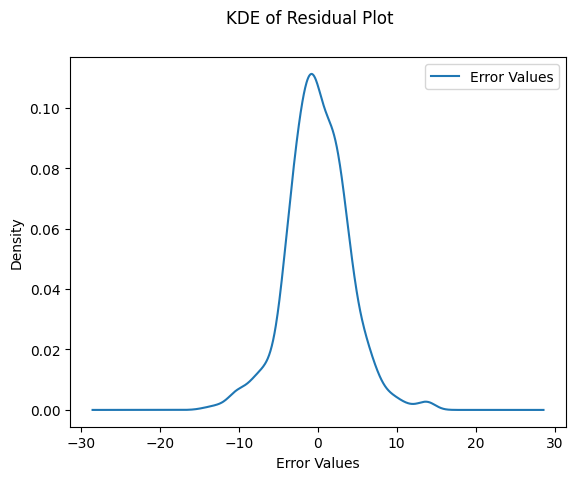

In [181]:
# as hvplot is not showing anything, I decided to just use pandas plotting
pd.DataFrame({'Error Values' : (test_residual)}).plot.kde()
plt.xlabel('Error Values')
plt.suptitle('KDE of Residual Plot')

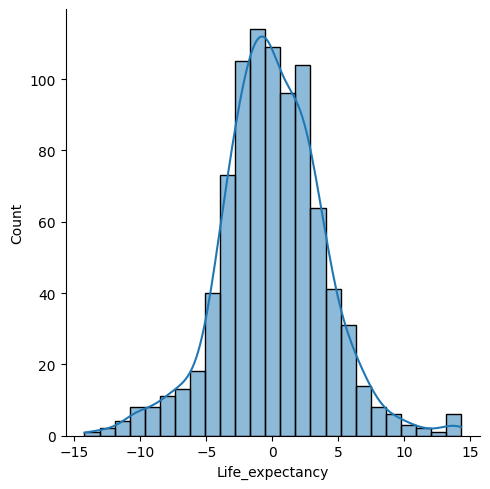

In [182]:
sns.displot(test_residual, bins=25, kde=True)
# as both of these plots somewhat follow the normal distribution,
# the linear regression is valid

Text(0.5, 0.98, 'Residual Plot')

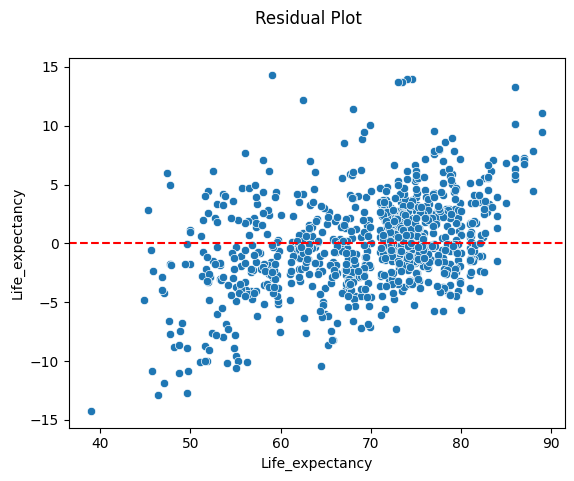

In [183]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='r', ls='--')
plt.suptitle('Residual Plot')
# since the residual plot shows that most of the residuals are close to 0,
# and there is no pattern, the linear regression is valid

Text(0.5, 0.98, 'Actual vs. Predicted Values')

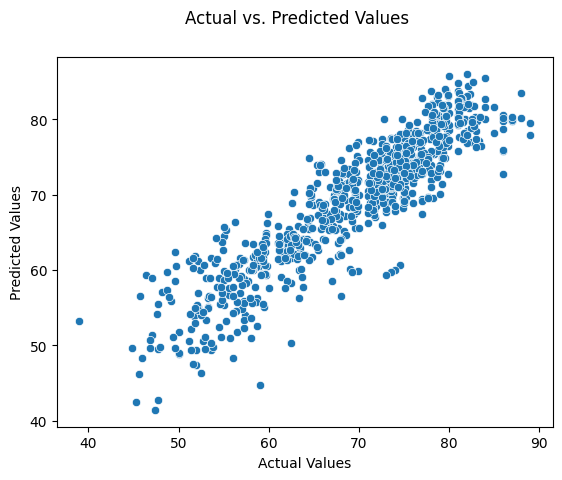

In [184]:
# comparing the test value with the predicted value
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs. Predicted Values')
# the line is somewhat linear, which means that the model is somewhat accurate